1. Loading the Dataset

In [59]:
# Importing necessary libraries
import pandas as pd

# Read the dataset
df = pd.read_csv('C:/Users/Perfect/Downloads/Conversational/tweet_emotions.csv')

# Display the first few rows of the dataset
df.head()


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


EDA

Check the data type of each column

In [60]:
# Check data types of each column
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

Check missing values

In [61]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
tweet_id     0
sentiment    0
content      0
dtype: int64


missing value visualization using bar plot

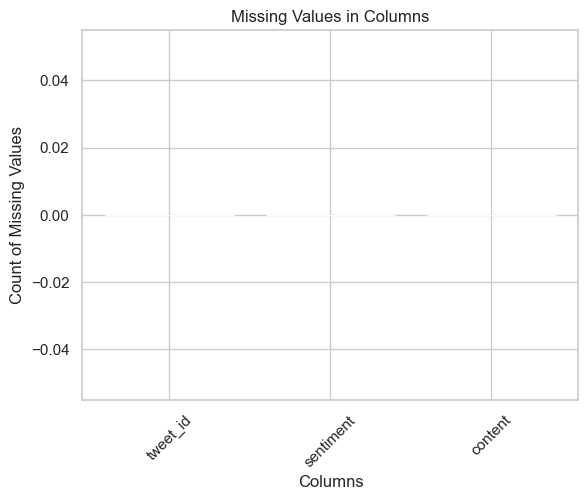

In [62]:
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()

# Create a bar plot
plt.bar(missing_values.index, missing_values.values, color='orange')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Check the unique values of columns and data distribution for imbalance

In [63]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].value_counts()
    print(f"Unique values in {column}:")
    print(unique_values)

Unique values in sentiment:
sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64
Unique values in content:
content
I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                            14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                             13
Happy Mother's Day!                                                                                                                     10
Happy Mothers Day                                                                                                                       10
happy mother's day                                                                                 

unique value using histogram

Skipping column: tweet_id (too many unique values: 40000)
Visualizing unique values for column: sentiment


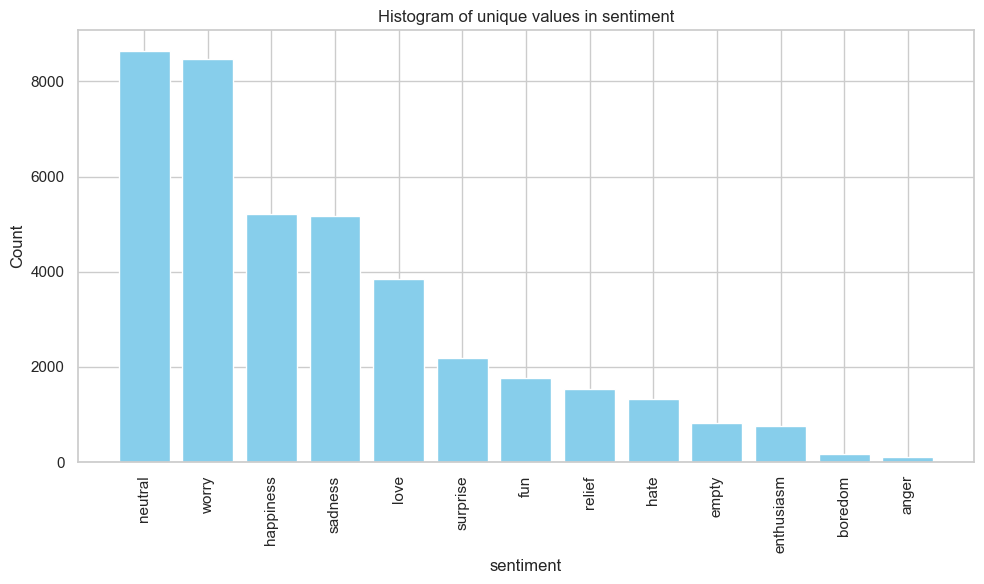

Skipping column: content (too many unique values: 39827)


In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the function to plot histogram
def plot_histogram(unique_values, column_name):
    plt.figure(figsize=(10, 6))
    plt.bar(unique_values.index.astype(str), unique_values.values, color='skyblue')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Histogram of unique values in {column_name}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Iterate through each column and visualize unique values
for column in df.columns:
    unique_values = df[column].value_counts()  # Get the counts of unique values
    if len(unique_values) <=50:  # Only plot if there are 50 or fewer unique values
        print(f"Visualizing unique values for column: {column}")
        plot_histogram(unique_values, column)
    else:
        print(f"Skipping column: {column} (too many unique values: {len(unique_values)})")

Check for duplicate rows

In [65]:
import pandas as pd

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


shown duplicate values using bar plot

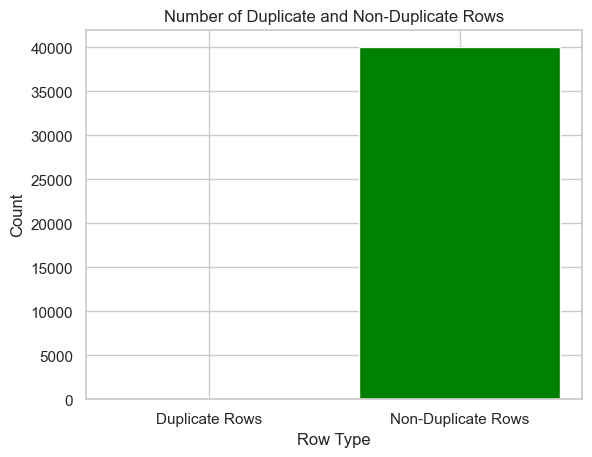

In [66]:
import matplotlib.pyplot as plt

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicate_rows)

# Count the number of non-duplicate rows
num_non_duplicates = len(df) - num_duplicates

# Create a bar plot
plt.bar(['Duplicate Rows', 'Non-Duplicate Rows'], [num_duplicates, num_non_duplicates], color=['red', 'green'])
plt.xlabel('Row Type')
plt.ylabel('Count')
plt.title('Number of Duplicate and Non-Duplicate Rows')
plt.show()

Check Class Distribution (Emotion Categories)

Class Distribution:

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64


C:\Users\Perfect\AppData\Local\Temp\ipykernel_2508\1501967214.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


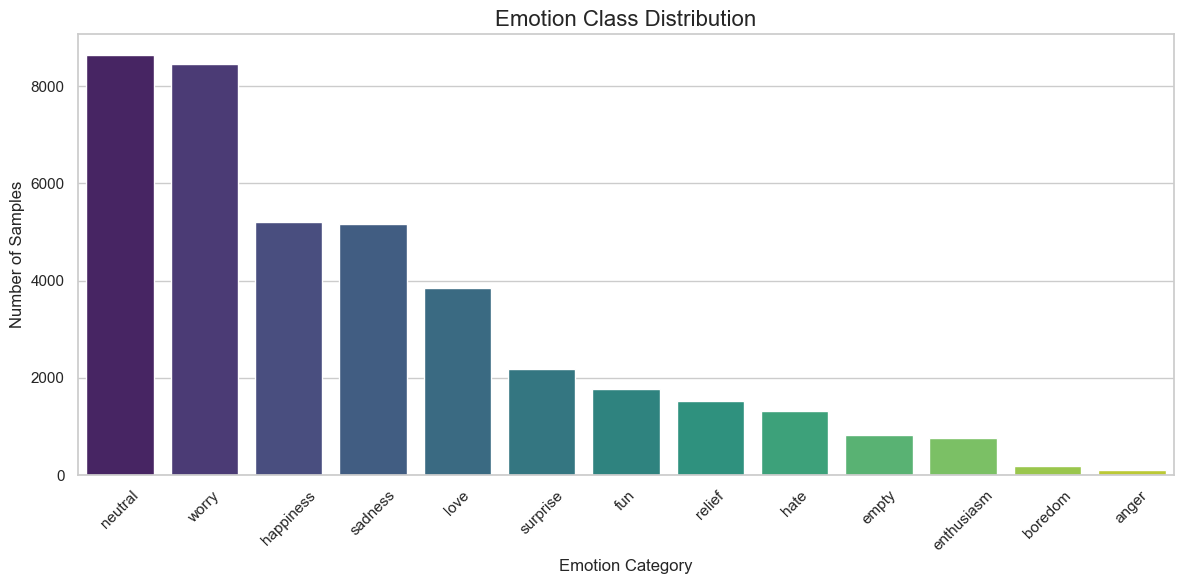

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count class distribution
emotion_counts = df['sentiment'].value_counts()

# Print distribution
print("Class Distribution:\n")
print(emotion_counts)

# Visualize distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.title("Emotion Class Distribution", fontsize=16)
plt.xlabel("Emotion Category", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Removing Non-Informative Column (tweet_id)

In [68]:
# Drop tweet_id column
df.drop(columns=['tweet_id'], inplace=True)


In [69]:
df.dtypes

sentiment    object
content      object
dtype: object

Look at Sample Texts per Emotion

In [70]:
# Display sample tweets for each emotion
emotion_categories = df['sentiment'].unique()

for emotion in emotion_categories:
    print(f"\nEmotion: {emotion}")
    print(df[df['sentiment'] == emotion]['content'].sample(3, random_state=42).to_string(index=False))



Emotion: empty
gor i am soo bored, man i don't think i could g...
                                   Is @ the pantry
                             I want a fake BLT....

Emotion: sadness
Boys are sitting down for photos, no touching a...
                          : why is it so cold!?!?!
@AwkwardTown I know. I think I'm going to have ...

Emotion: enthusiasm
is upload video geje di youtube  http://plurk.c...
@labelladeanna whatsoever do you mean by 'how I...
Stood outsiden got the WORST butterflies everrrrr!

Emotion: neutral
          @sojanjose4u it's working now,IT'S OKAY!
                                    @noesh leyendo
@eincline that's me right now, all I can do is ...

Emotion: worry
@jonconnelly will add that. It should be hard r...
                                Head in the clouds
@Wykrzyknik uff, ble litt trist av ï¿½ lese den...

Emotion: surprise
@felicityrose why would they take a photo with ...
         nvm, lexi's playlist is working its magic
     @JSNorwood oh, are w

Word Cloud per Emotion

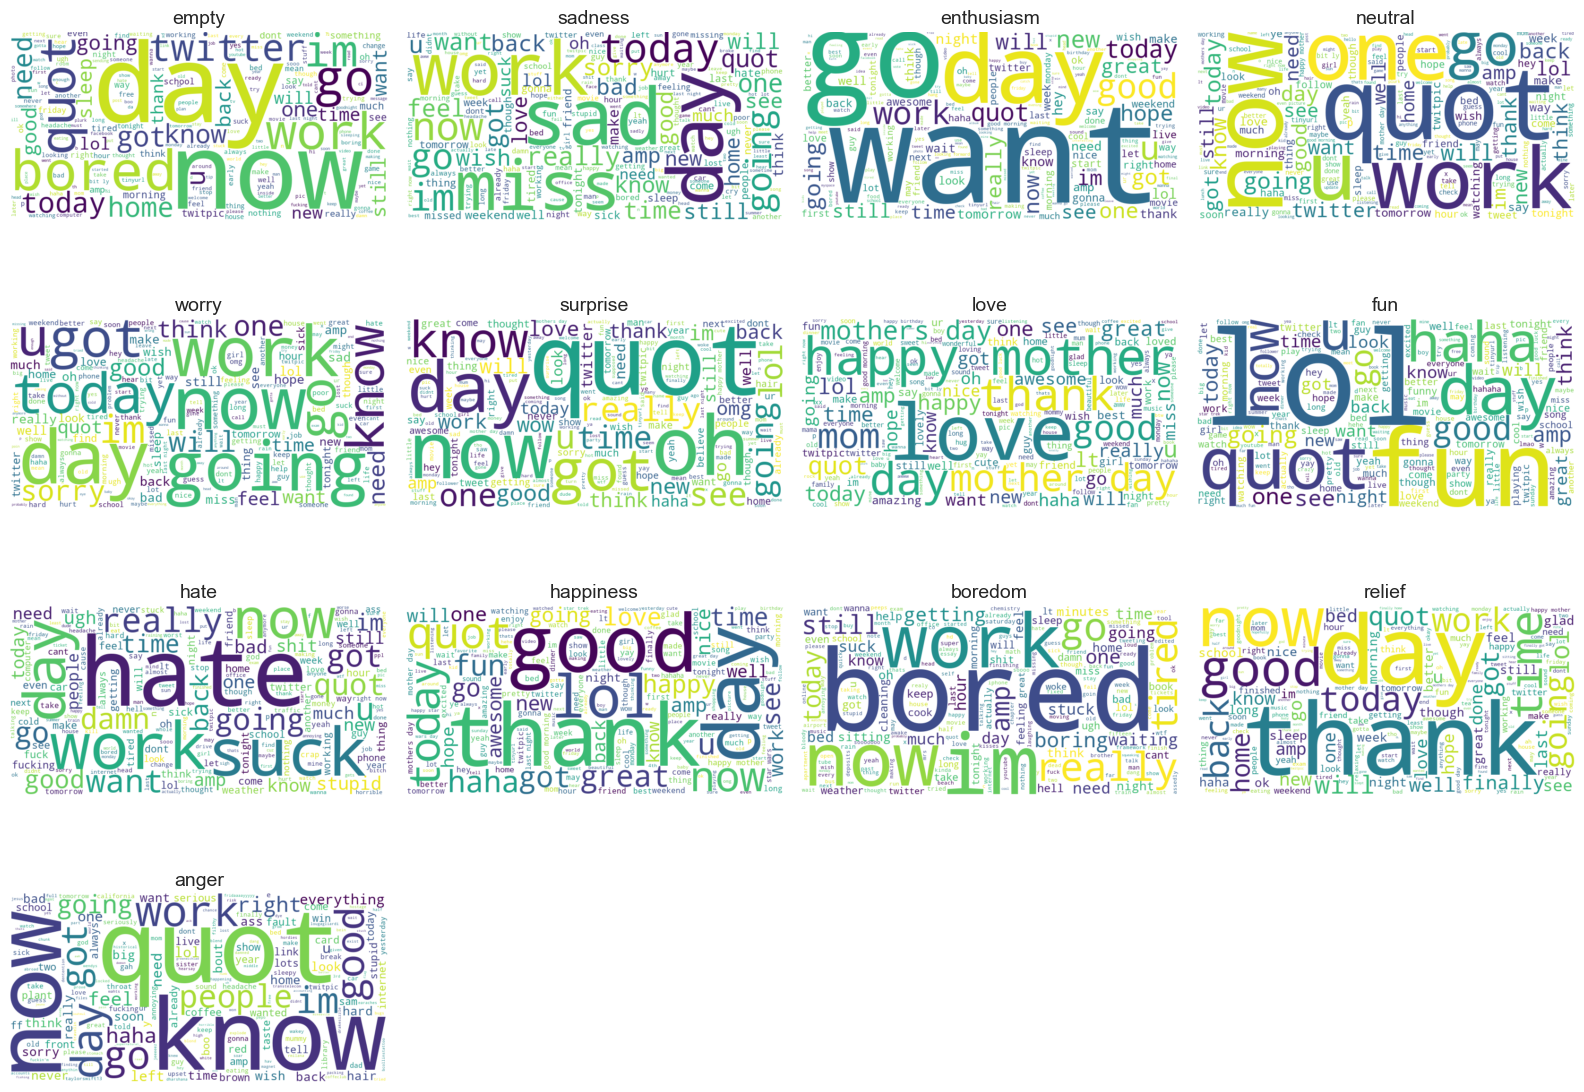

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Optional: basic text cleaning function
def clean_text(text):
    text = text.lower()
    text = text.replace('@', '').replace('#', '')
    return text

# Apply cleaning (if needed)
df['clean_content'] = df['content'].apply(clean_text)

# Plot word clouds for each emotion
emotion_categories = df['sentiment'].unique()

plt.figure(figsize=(16, 12))
for i, emotion in enumerate(emotion_categories, 1):
    text = ' '.join(df[df['sentiment'] == emotion]['clean_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.subplot(4, 4, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(emotion, fontsize=14)

plt.tight_layout()
plt.show()


Text Length Distributions

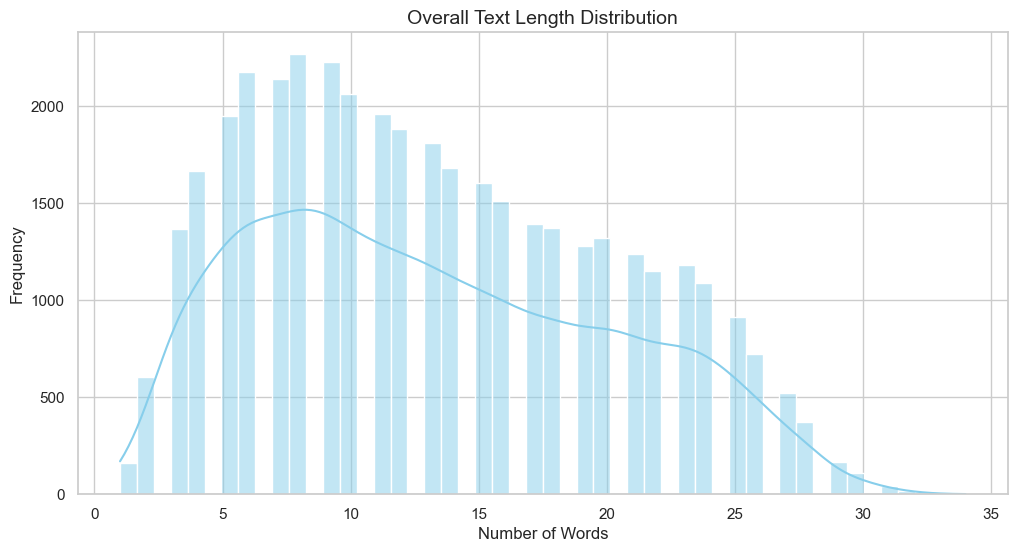

C:\Users\Perfect\AppData\Local\Temp\ipykernel_2508\1533834444.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='text_length', palette='viridis')


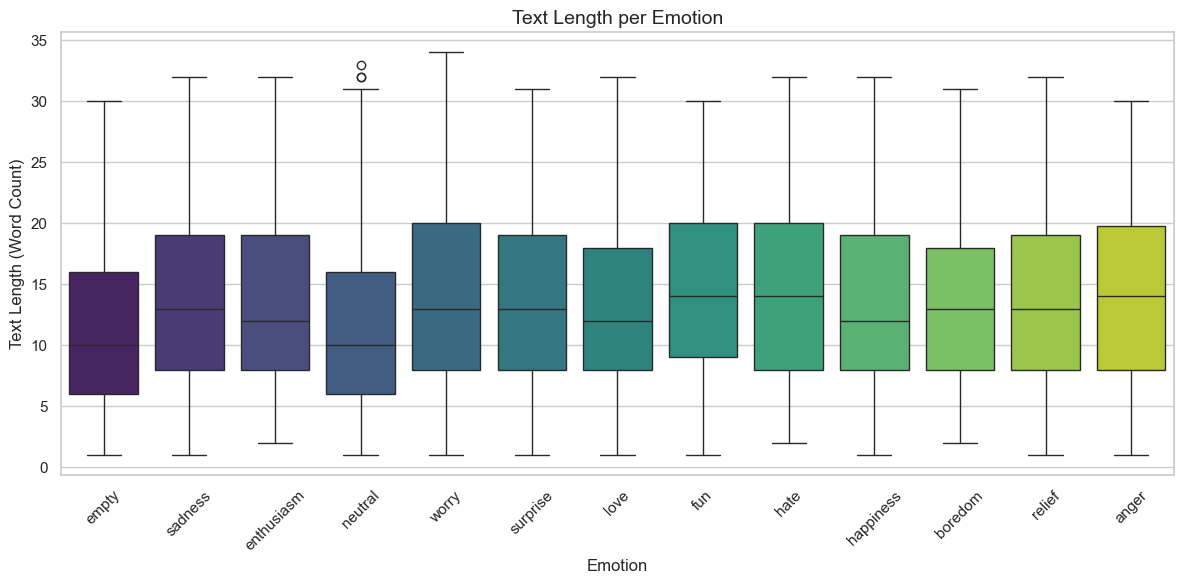

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for text length
df['text_length'] = df['content'].apply(lambda x: len(x.split()))

# Plot overall distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title("Overall Text Length Distribution", fontsize=14)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sentiment', y='text_length', palette='viridis')
plt.xticks(rotation=45)
plt.title("Text Length per Emotion", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Text Length (Word Count)")
plt.tight_layout()
plt.show()

preprocessing

Lowercasing

In [73]:
# Lowercase the content
df['clean_content'] = df['content'].str.lower()


Removing punctuation, stopwords, URLs, and mentions

In [74]:
import re
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Clean function
def clean_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)


In [75]:
df['clean_content'] = df['clean_content'].apply(clean_text)
# Display cleaned content
df[['content', 'clean_content']].head(10)

,content,clean_content
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends soon
4,@dannycastillo We want to trade with someone w...,want trade someone houston tickets one
5,Re-pinging @ghostridah14: why didn't you go to...,repinging didnt go prom bc bf didnt like friends
6,"I should be sleep, but im not! thinking about ...",sleep im thinking old friend want hes married ...
7,Hmmm. http://www.djhero.com/ is down,hmmm
8,@charviray Charlene my love. I miss you,charlene love miss
9,@kelcouch I'm sorry at least it's Friday?,im sorry least friday


Tokenization

In [76]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_content'].apply(word_tokenize)
# Display tokenized content
df[['clean_content', 'tokens']].head(10)

,clean_content,tokens
0,know listenin bad habit earlier started freaki...,"[know, listenin, bad, habit, earlier, started,..."
1,layin n bed headache ughhhhwaitin call,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]"
3,wants hang friends soon,"[wants, hang, friends, soon]"
4,want trade someone houston tickets one,"[want, trade, someone, houston, tickets, one]"
5,repinging didnt go prom bc bf didnt like friends,"[repinging, didnt, go, prom, bc, bf, didnt, li..."
6,sleep im thinking old friend want hes married ...,"[sleep, im, thinking, old, friend, want, hes, ..."
7,hmmm,[hmmm]
8,charlene love miss,"[charlene, love, miss]"
9,im sorry least friday,"[im, sorry, least, friday]"


Lemmatization

In [77]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Lemmatization function
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # join tokens back into a string
    return [token.lemma_ for token in doc]

# Apply lemmatization
df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)
# Display lemmatized tokens
df[['tokens', 'lemmatized_tokens']].head(10)


,tokens,lemmatized_tokens
0,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, early, start, fre..."
1,"[layin, n, bed, headache, ughhhhwaitin, call]","[layin, n, bed, headache, ughhhhwaitin, call]"
2,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]"
3,"[wants, hang, friends, soon]","[want, hang, friend, soon]"
4,"[want, trade, someone, houston, tickets, one]","[want, trade, someone, houston, ticket, one]"
5,"[repinging, didnt, go, prom, bc, bf, didnt, li...","[repinge, do, not, go, prom, bc, bf, do, not, ..."
6,"[sleep, im, thinking, old, friend, want, hes, ...","[sleep, I, m, think, old, friend, want, he, s,..."
7,[hmmm],[hmmm]
8,"[charlene, love, miss]","[charlene, love, miss]"
9,"[im, sorry, least, friday]","[I, m, sorry, least, friday]"


Hugging Face Tokenizers 

In [78]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
# Tokenize the cleaned content
df['tokenized_content'] = df['clean_content'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))
# Display tokenized content
df[['clean_content', 'tokenized_content']].head(10)


,clean_content,tokenized_content
0,know listenin bad habit earlier started freaki...,"[101, 2113, 4952, 2378, 2919, 10427, 3041, 231..."
1,layin n bed headache ughhhhwaitin call,"[101, 3913, 2378, 1050, 2793, 14978, 1057, 560..."
2,funeral ceremonygloomy friday,"[101, 6715, 5103, 23296, 17650, 2100, 5958, 102]"
3,wants hang friends soon,"[101, 4122, 6865, 2814, 2574, 102]"
4,want trade someone houston tickets one,"[101, 2215, 3119, 2619, 5395, 9735, 2028, 102]"
5,repinging didnt go prom bc bf didnt like friends,"[101, 16360, 23180, 2134, 2102, 2175, 20877, 4..."
6,sleep im thinking old friend want hes married ...,"[101, 3637, 10047, 3241, 2214, 2767, 2215, 200..."
7,hmmm,"[101, 17012, 2213, 102]"
8,charlene love miss,"[101, 25869, 11474, 2293, 3335, 102]"
9,im sorry least friday,"[101, 10047, 3374, 2560, 5958, 102]"


Handling Class Imbalance with Class Weights

1: Calculate Class Weights

In [79]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get unique classes and their counts
classes = df['sentiment'].unique()

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=classes, y=df['sentiment'])
class_weights_dict = dict(zip(classes, class_weights))

print("Class Weights: ", class_weights_dict)


Class Weights:  {'empty': 3.7205841317086783, 'sadness': 0.5957256683297342, 'enthusiasm': 4.053917097395359, 'neutral': 0.3562078116373092, 'worry': 0.3637454872825484, 'surprise': 1.4069149871619007, 'love': 0.8008649341288592, 'fun': 1.7325017325017324, 'hate': 2.3257166114308974, 'happiness': 0.5906936219856166, 'boredom': 17.189514396218307, 'relief': 2.0163322915616493, 'anger': 27.972027972027973}


In [80]:
print(df.columns)

Index(['sentiment', 'content', 'clean_content', 'text_length', 'tokens',
       'lemmatized_tokens', 'tokenized_content'],
      dtype='object')


Mapping columns into default e.g into 6 columns and split the data into train-test

In [ ]:
# Define the mapping from your 13 labels to 6 default labels for Hugging Face's model
label_map = {
    'empty': 'neutral',  # Example mapping, you can adjust based on your needs
    'sadness': 'sadness',
    'enthusiasm': 'joy',  # Mapping enthusiasm to joy
    'neutral': 'neutral',
    'worry': 'fear',  # Mapping worry to fear
    'surprise': 'surprise',
    'love': 'joy',  # Mapping love to joy
    'fun': 'joy',  # Mapping fun to joy
    'hate': 'anger',  # Mapping hate to anger
    'happiness': 'joy',  # Mapping happiness to joy
    'boredom': 'neutral',  # Mapping boredom to neutral
    'relief': 'joy',  # Mapping relief to joy
    'anger': 'anger'
}

# Apply the mapping to your 'sentiment' column (which contains the 13 original labels)
df['mapped_sentiment'] = df['sentiment'].map(label_map)

# Remove rows with NaN values (if there are any after mapping)
df = df.dropna(subset=['mapped_sentiment'])

# Now proceed with balancing the dataset if you haven't done it already
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['mapped_sentiment'] == 'neutral']
df_minority = df[df['mapped_sentiment'] != 'neutral']

# Upsample minority classes to match the majority class count
df_minority_upsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples=len(df_majority), 
                                 random_state=42)

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Now, split the dataset into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_balanced, test_size=0.2, random_state=42, stratify=df_balanced['mapped_sentiment'])

# Assuming the text data is in 'clean_content' and labels in 'mapped_sentiment'
train_texts = train_data['clean_content'].tolist()  # Training texts
test_texts = test_data['clean_content'].tolist()    # Test texts

train_labels = train_data['mapped_sentiment'].tolist()  # Training labels
test_labels = test_data['mapped_sentiment'].tolist()    # Test labels

# Check the data shapes
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")


Training Data Shape: (15430, 8)
Testing Data Shape: (3858, 8)


Model Development

TF-IDF + Logistic Regression 

Accuracy: 0.5542
Precision: 0.5246
Recall: 0.5542
F1 Score: 0.4913
Classification Report:
              precision    recall  f1-score   support

       anger       0.25      0.04      0.07        96
        fear       0.38      0.13      0.19       540
         joy       0.57      0.39      0.46       841
     neutral       0.57      0.88      0.69      1929
     sadness       0.39      0.11      0.18       314
    surprise       0.71      0.04      0.07       138

    accuracy                           0.55      3858
   macro avg       0.48      0.26      0.28      3858
weighted avg       0.52      0.55      0.49      3858



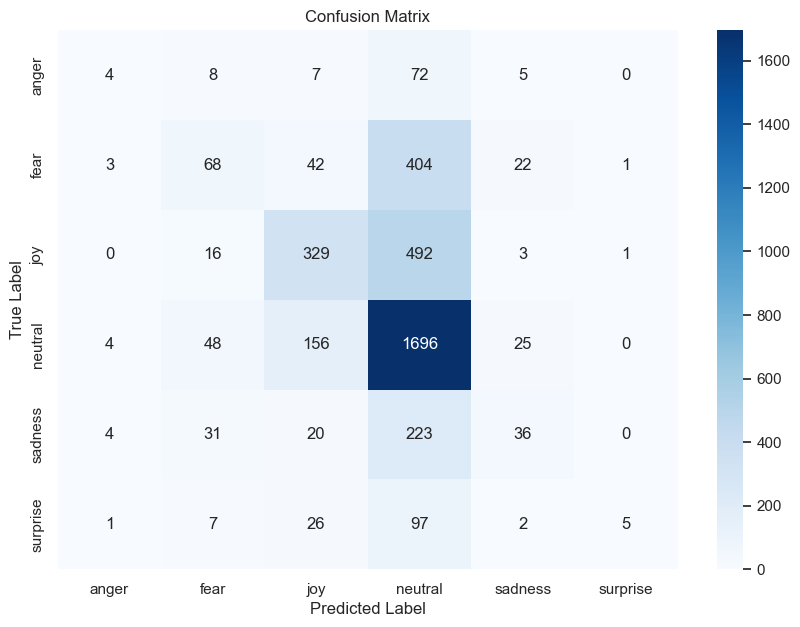

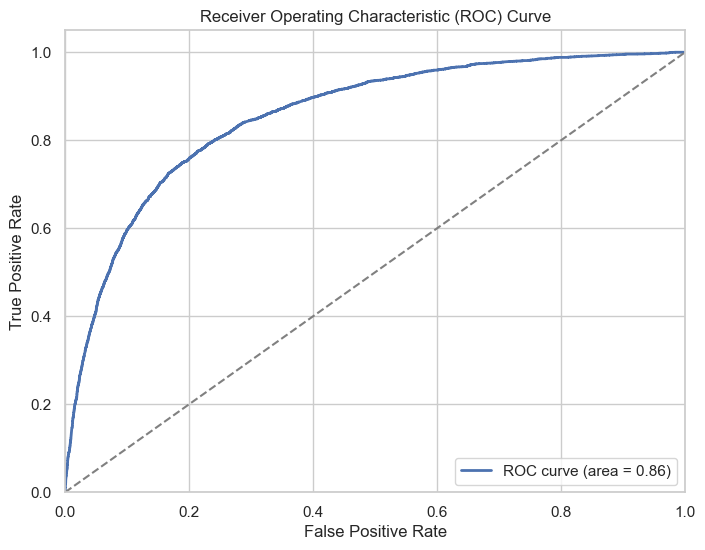

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# Assuming your balanced and mapped dataset is in `train_data` and `test_data`
# Extracting the text and labels
train_texts = train_data['clean_content'].tolist()  # Training texts
test_texts = test_data['clean_content'].tolist()    # Test texts
train_labels = train_data['mapped_sentiment'].tolist()  # Training labels
test_labels = test_data['mapped_sentiment'].tolist()    # Test labels

# 1. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features

# Fitting and transforming the training data
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)

# 2. Logistic Regression Model with Hyperparameter Tuning using GridSearchCV
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_tfidf, train_labels)

# 3. Model Evaluation
# Predict on test data
y_pred = logreg.predict(X_test_tfidf)

# 4. Evaluation Metrics
accuracy = accuracy_score(test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 5. Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)

# Plotting Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. ROC Curve
# Binarize the labels for ROC curve plotting
y_test_binarized = label_binarize(test_labels, classes=logreg.classes_)
y_pred_prob = logreg.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


TF-IDF + Naive Bayes

C:\Users\Perfect\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Perfect\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Perfect\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Accuracy: 0.5311
Precision: 0.6124
Recall: 0.5311
F1 Score: 0.4192
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        96
        fear       0.73      0.05      0.09       540
         joy       0.61      0.20      0.29       841
     neutral       0.52      0.96      0.68      1929
     sadness       1.00      0.02      0.04       314
    surprise       1.00      0.01      0.01       138

    accuracy                           0.53      3858
   macro avg       0.64      0.21      0.19      3858
weighted avg       0.61      0.53      0.42      3858



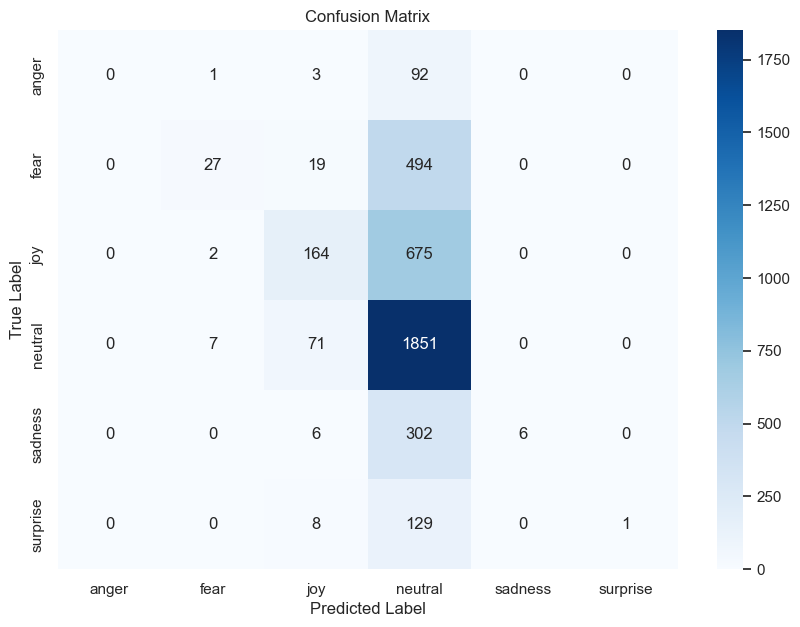

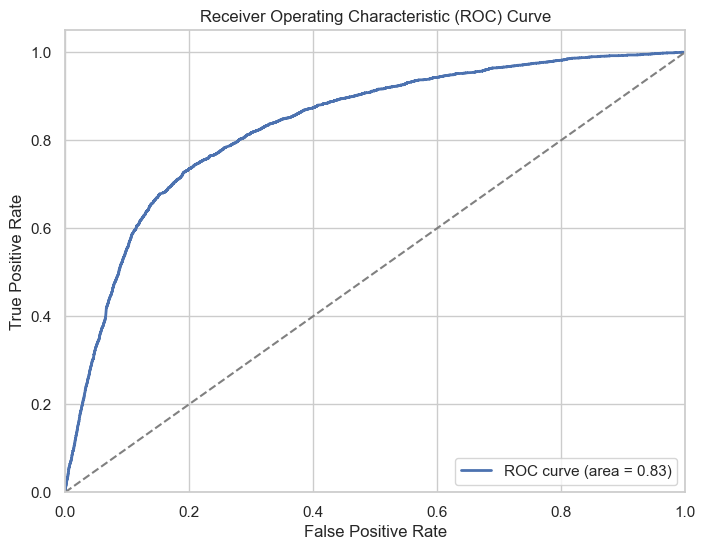

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# 1. TF-IDF Vectorization (same as before)
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features

# Fitting and transforming the training data
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)

# 2. Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_labels)

# 3. Model Evaluation
# Predict on test data
y_pred = nb_model.predict(X_test_tfidf)

# 4. Evaluation Metrics
accuracy = accuracy_score(test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 5. Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)

# Plotting Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. ROC Curve
# Binarize the labels for ROC curve plotting
y_test_binarized = label_binarize(test_labels, classes=nb_model.classes_)
y_pred_prob = nb_model.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 TF-IDF + SVM 

Accuracy: 0.4502
Precision: 0.5276
Recall: 0.4502
F1 Score: 0.4727
Classification Report:
              precision    recall  f1-score   support

       anger       0.18      0.48      0.27        96
        fear       0.31      0.36      0.33       540
         joy       0.50      0.52      0.51       841
     neutral       0.69      0.46      0.55      1929
     sadness       0.25      0.40      0.30       314
    surprise       0.15      0.33      0.21       138

    accuracy                           0.45      3858
   macro avg       0.35      0.43      0.36      3858
weighted avg       0.53      0.45      0.47      3858



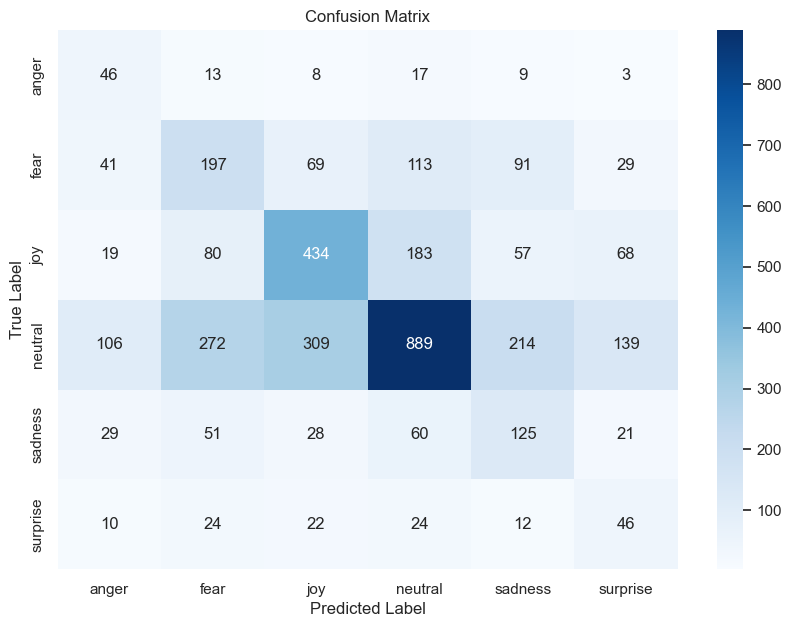

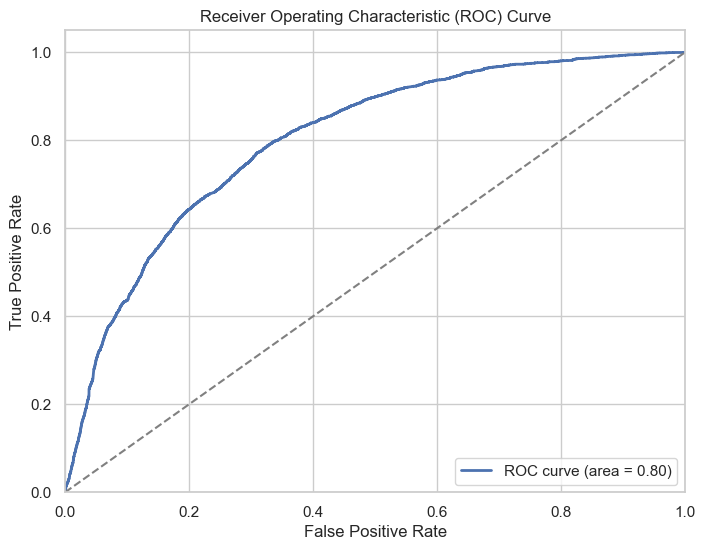

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# 1. TF-IDF Vectorization (same as before)
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features

# Fitting and transforming the training data
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)

# 2. SVM Model with Linear Kernel
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_tfidf, train_labels)

# 3. Model Evaluation
# Predict on test data
y_pred = svm_model.predict(X_test_tfidf)

# 4. Evaluation Metrics
accuracy = accuracy_score(test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 5. Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)

# Plotting Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. ROC Curve
# Binarize the labels for ROC curve plotting
y_test_binarized = label_binarize(test_labels, classes=svm_model.classes_)
y_pred_prob = svm_model.decision_function(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Hugging-Face Transformers

Distilbert-base-uncased-emotion

C:\Users\Perfect\AppData\Local\Temp\ipykernel_2508\2495735233.py:74: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,1.364000,1.178219
2,1.148000,1.177993
3,0.792600,1.274761


Evaluation Results: {'eval_loss': 1.177992820739746, 'eval_runtime': 181.8265, 'eval_samples_per_second': 21.218, 'eval_steps_per_second': 1.331, 'epoch': 3.0}


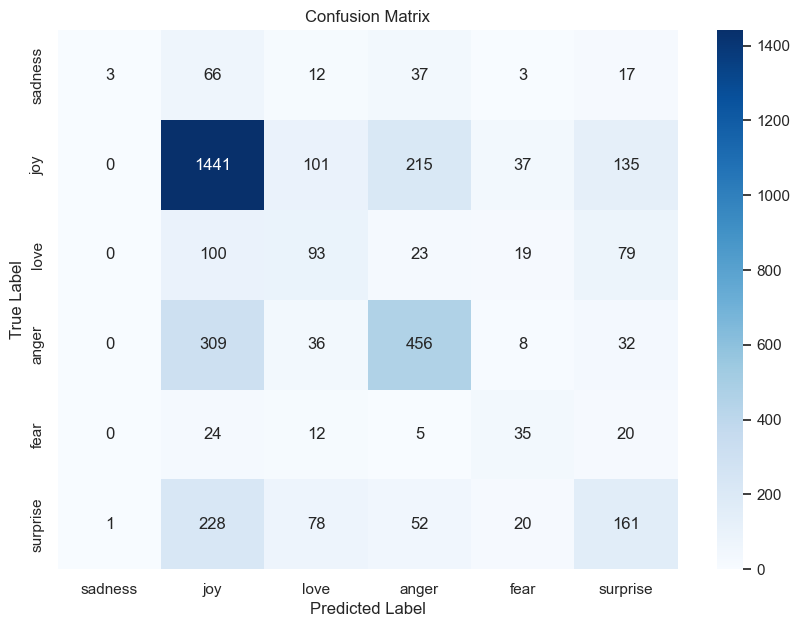

              precision    recall  f1-score   support

     sadness       0.75      0.02      0.04       138
         joy       0.66      0.75      0.70      1929
        love       0.28      0.30      0.29       314
       anger       0.58      0.54      0.56       841
        fear       0.29      0.36      0.32        96
    surprise       0.36      0.30      0.33       540

    accuracy                           0.57      3858
   macro avg       0.49      0.38      0.37      3858
weighted avg       0.57      0.57      0.55      3858



In [86]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

# Step 1: Load pre-trained model and tokenizer
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Step 2: Prepare the data
# Assuming 'train_data' and 'test_data' are already defined and contain 'clean_content' (text) and 'mapped_sentiment' (labels)
def tokenize_data(texts, tokenizer, max_length=512):
    return tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')

train_texts = train_data['clean_content'].tolist()  # Ensure you're using the correct column name
test_texts = test_data['clean_content'].tolist()

train_encodings = tokenize_data(train_texts, tokenizer)
test_encodings = tokenize_data(test_texts, tokenizer)

# Assuming 'mapped_sentiment' contains string labels, map them to integers
label_map = {label: idx for idx, label in enumerate(train_data['mapped_sentiment'].unique())}
train_data['mapped_sentiment'] = train_data['mapped_sentiment'].map(label_map)
test_data['mapped_sentiment'] = test_data['mapped_sentiment'].map(label_map)

# Now, convert the labels to tensors
train_labels = torch.tensor(train_data['mapped_sentiment'].values, dtype=torch.long)
test_labels = torch.tensor(test_data['mapped_sentiment'].values, dtype=torch.long)

# Continue with tokenization and the rest of the pipeline
train_encodings = tokenize_data(train_texts, tokenizer)
test_encodings = tokenize_data(test_texts, tokenizer)

# Create a custom Dataset class
class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Use the class to create datasets
train_dataset = EmotionDataset(train_encodings, train_labels)
test_dataset = EmotionDataset(test_encodings, test_labels)


# Step 5: Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",     # evaluate every epoch
    save_strategy="epoch",           # save model every epoch
    load_best_model_at_end=True      # load the best model when finished
)

# Step 6: Initialize Trainer
trainer = Trainer(
    model=model,                         # the model to be trained
    args=training_args,                  # training arguments
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    tokenizer=tokenizer,                 # tokenizer
)

# Step 7: Train the model
trainer.train()

# Step 8: Evaluate the model
results = trainer.evaluate()

# Print evaluation results
print(f"Evaluation Results: {results}")

# Get predictions for confusion matrix
predictions, true_labels, _ = trainer.predict(test_dataset)

# Convert predictions to labels
predicted_labels = predictions.argmax(axis=-1)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.config.id2label.values(), yticklabels=model.config.id2label.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Classification Report
print(classification_report(true_labels, predicted_labels, target_names=model.config.id2label.values()))


Tone-Adaptive Conversational Agent

In [90]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Load the pre-trained model
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Get id2label mapping
id2label = model.config.id2label

# Define tone-based responses
tone_responses = {
    "sadness": "I'm here for you. Want to talk about it?",
    "joy": "That's awesome! Tell me more 😊",
    "love": "Aww, that's sweet! ❤️",
    "anger": "I get that. Want to let it out?",
    "fear": "It's okay to be scared. You're not alone.",
    "surprise": "Wow! That’s unexpected. What happened?"
}

# Interactive loop
print("Talk to me! (type 'exit' to quit)")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Goodbye! 💬")
        break

    # Tokenize input
    inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding=True)

    # Get prediction
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        pred_class = torch.argmax(probs).item()
        emotion = id2label[pred_class]

    # Respond based on emotion
    response = tone_responses.get(emotion, "I hear you.")
    print(f"(Detected Emotion: {emotion})")
    print(f"Bot: {response}\n")


Talk to me! (type 'exit' to quit)
(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: joy)
Bot: That's awesome! Tell me more 😊

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected Emotion: anger)
Bot: I get that. Want to let it out?

(Detected